# Assignment 1: Problem-solving task

In [657]:
# Import all required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
import numpy as np

# To ignore future warnings
import warnings
warnings.filterwarnings('ignore')

## Task 1. Examine and correct data types
Examine the data types assigned by the 'pandas' library for each variable in Table 1. Check/assess them with the dataset description provided in Table 1. If there seems to be a mismatch in the data type assigned by the library and the data type as per the description for a variable, correct that data type. Details about the data types that required correction should be included. Finally, attach a screenshot showing the corrected data types of all variables.

In [729]:
# read the Assignment dataset
df = pd.read_csv('Assignment 1 DATASET 1 – D1(2).csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145490 entries, 0 to 145489
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145490 non-null  object 
 1   Day            145490 non-null  int64  
 2   Month          145490 non-null  int64  
 3   Location       145490 non-null  object 
 4   MinTemp        144005 non-null  float64
 5   MaxTemp        144229 non-null  float64
 6   Rainfall       142228 non-null  float64
 7   Evaporation    82670 non-null   float64
 8   Sunshine       75625 non-null   float64
 9   WindGustDir    135163 non-null  object 
 10  WindGustSpeed  135226 non-null  float64
 11  WindDir9am     134922 non-null  object 
 12  WindDir3pm     141262 non-null  object 
 13  WindSpeed9am   143722 non-null  float64
 14  WindSpeed3pm   142428 non-null  float64
 15  Humidity9am    142836 non-null  float64
 16  Humidity3pm    140983 non-null  float64
 17  Pressure9am    130425 non-nul

In [692]:
# Set the maximum number of columns to display all columns
pd.set_option('display.max_columns', None)
print(df.head(20))

          Date  Day  Month     Location  MinTemp  MaxTemp  Rainfall  \
0   11/01/2008    1     11  Archerfield     13.8     23.0       0.7   
1   11/02/2008    2     11  Archerfield      7.4     25.1       0.0   
2   11/03/2008    3     11  Archerfield     12.9     25.7       0.0   
3   11/04/2008    4     11  Archerfield      9.2     28.0       0.0   
4   11/05/2008    5     11  Archerfield     17.5     32.3       1.0   
5   11/06/2008    6     11  Archerfield     14.6     29.7       0.2   
6   11/07/2008    7     11  Archerfield     14.3     25.0       0.0   
7   11/08/2008    8     11  Archerfield      7.7     26.7       0.0   
8   11/09/2008    9     11  Archerfield      9.7     31.9       0.0   
9   11/10/2008   10     11  Archerfield     13.1     30.1       1.4   
10  11/11/2008   11     11  Archerfield     13.4     30.4       0.0   
11  11/12/2008   12     11  Archerfield     15.9     21.7       2.2   
12  11/13/2008   13     11  Archerfield     15.9     18.6      15.6   
13  11

Looking at the first 20 rows of the data frame, I am unable to see what sort of inputs there are for 'Evaporation', 'Sunshine', or 'ENSO'. I will investigate these further

In [693]:
# Unique values in Evaporation
print(df['Evaporation'].unique())

[     nan 1.20e+01 1.48e+01 1.26e+01 1.08e+01 1.14e+01 1.12e+01 1.30e+01
 9.80e+00 1.46e+01 1.10e+01 1.28e+01 1.38e+01 1.64e+01 1.74e+01 1.60e+01
 1.36e+01 8.00e+00 8.20e+00 8.60e+00 1.42e+01 1.58e+01 1.62e+01 1.34e+01
 1.44e+01 1.18e+01 1.56e+01 1.52e+01 1.16e+01 9.60e+00 6.60e+00 6.00e-01
 6.00e+00 3.00e+00 2.00e+00 5.20e+00 9.00e+00 1.02e+01 1.00e+01 7.40e+00
 8.40e+00 9.20e+00 9.40e+00 1.24e+01 1.04e+01 7.20e+00 6.80e+00 7.60e+00
 4.40e+00 6.40e+00 7.80e+00 7.00e+00 8.80e+00 6.20e+00 5.80e+00 2.00e-01
 2.40e+00 1.80e+00 2.20e+00 2.80e+00 5.00e+00 5.60e+00 4.80e+00 4.20e+00
 4.00e+00 3.20e+00 4.60e+00 3.40e+00 3.60e+00 0.00e+00 1.40e+00 3.80e+00
 8.00e-01 2.60e+00 1.60e+00 1.20e+00 1.00e+00 5.40e+00 1.06e+01 1.68e+01
 1.70e+01 2.02e+01 1.40e+01 1.72e+01 1.22e+01 1.50e+01 1.82e+01 1.32e+01
 4.10e+00 1.70e+00 4.00e-01 1.90e+00 6.48e+01 3.20e+01 2.62e+01 2.46e+01
 2.33e+01 1.54e+01 3.26e+01 3.04e+01 3.44e+01 1.80e+01 4.94e+01 1.88e+01
 1.90e+01 1.84e+01 8.10e+00 4.90e+00 2.52e+01 2.40e

In [694]:
# Unique values in Evaporation
print(df['Sunshine'].unique())

[ nan 12.3 13.  13.3 10.6 12.2  8.4  0.  12.6 13.2 12.7 12.1 10.3 13.1
 12.9 11.3  6.9 10.9  3.7  5.9 10.5 12.4 13.4 13.6  7.4 10.   2.3  6.6
  0.3 10.7 11.6 10.2  9.  12.   3.   7.9 11.5 11.2  4.8  5.8  6.  11.1
 11.8 11.4 10.8  7.8 11.   5.5  4.7  4.2  4.4  6.2  9.8  9.9  4.3  8.
  9.6 10.4  9.3  8.7  7.6  7.5 10.1  6.3  2.8  0.7  9.4  9.7  0.6  5.1
  8.3  4.1  3.9  6.8  8.6  2.7  8.2  3.1  1.8  0.1  0.8  3.4  7.1  5.
  5.7  6.1  7.   2.9  2.5  4.6  8.9  9.1  1.7  8.1  9.5  1.2  1.4  8.8
  2.2  3.5  9.2  1.9 11.7 11.9  7.7  0.9 12.5  2.1 12.8 13.7  8.5  0.2
  4.   2.4  5.2  0.5  6.4  4.5  1.1  2.   0.4  1.5  3.3  6.5  2.6  3.8
  3.6  3.2  6.7  5.4  7.2  4.9  1.   1.6  5.3  7.3  5.6  1.3 13.8 13.5
 14.  13.9 14.1 14.5 14.3 14.2]


In [695]:
# Unique values in Evaporation
print(df['ENSO'].unique())

[nan 'Yes' '.' 'No' 'yes']


After after viewing the entries of the data frame, the following corrections will be made;
1. 'Date' is currently saved in our data frame as an 'object' type. Storing it as a 'datetime64' type would be more appropriate
2. Variables with Yes/No entries will be converted to Binary values and stored as an int64 variable type. The 'ENSO' variable will need to be cleaned first, due to the presence of inconsistent data


In [730]:
# Convert the 'DateColumn' to a datetime data type
df['Date'] = pd.to_datetime(df['Date'])



In [731]:
df['ENSO'] = df['ENSO'].replace('yes', 'Yes')
df.loc[df['ENSO'] == '.', 'ENSO'] = np.nan
pd.set_option('display.max_rows', None)
print(df['ENSO'].value_counts(dropna=False).sort_index(ascending=True))

No        383
Yes     13165
NaN    131942
Name: ENSO, dtype: int64


In [732]:
# change ENSO into binary 0/1 variable
df_map = {'No':0, 'Yes': 1}
df['ENSO'] = df['ENSO'].map(df_map)
print(df['ENSO'].value_counts(dropna=False).sort_index(ascending=True))

0.0       383
1.0     13165
NaN    131942
Name: ENSO, dtype: int64


In [733]:
# change RainLastWeek to binary 0/1 variable
df_map = {'No':0, 'Yes': 1}
df['RainLastWeek'] = df['RainLastWeek'].map(df_map)
print(df['RainLastWeek'].value_counts(dropna=False).sort_index(ascending=True))

0.0    110323
1.0     31905
NaN      3262
Name: RainLastWeek, dtype: int64


In [734]:
# change RainToday into binary 0/1 variable
df_map = {'No':0, 'Yes': 1}
df['RainToday'] = df['RainToday'].map(df_map)
print(df['RainToday'].value_counts(dropna=False).sort_index(ascending=True))

0.0    110341
1.0     31887
NaN      3262
Name: RainToday, dtype: int64


In [735]:
# change RainTomorrow into binary 0/1 variable
df_map = {'No':0, 'Yes': 1}
df['RainTomorrow'] = df['RainTomorrow'].map(df_map)
print(df['RainTomorrow'].value_counts(dropna=False).sort_index(ascending=True))

0.0    110338
1.0     31884
NaN      3268
Name: RainTomorrow, dtype: int64


In [736]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145490 entries, 0 to 145489
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145490 non-null  datetime64[ns]
 1   Day            145490 non-null  int64         
 2   Month          145490 non-null  int64         
 3   Location       145490 non-null  object        
 4   MinTemp        144005 non-null  float64       
 5   MaxTemp        144229 non-null  float64       
 6   Rainfall       142228 non-null  float64       
 7   Evaporation    82670 non-null   float64       
 8   Sunshine       75625 non-null   float64       
 9   WindGustDir    135163 non-null  object        
 10  WindGustSpeed  135226 non-null  float64       
 11  WindDir9am     134922 non-null  object        
 12  WindDir3pm     141262 non-null  object        
 13  WindSpeed9am   143722 non-null  float64       
 14  WindSpeed3pm   142428 non-null  float64       
 15  

## Task 2. Use suitable statistical measures and functions
1. Identify and report the variables with skewness. Show the detail.
2. There may be inconsistencies or errors in the data. List the errors identified and detail how you have identified them.
3. Summarise your findings (e.g., noise and data quality problem in the data, patterns that you may have observed, etc) during this data exploration process.
Respond to the following questions:
4. Give the details (location and month) of the longest day (the day which had the most sunshine) recorded in this dataset.
5. What was the average maximum temperature recorded in 2016 in Uluru when the sudden burst in wind speed was in the Southerly direction?
6. List the top-5 locations based on the total amount of rainfall recorded in 2017.
7. Give a summary of the wind directions such as the frequency of a particular wind direction when it was a rainy day.

### 1. Identify and report the variables with skewness. Show the detail.

Skewness is only applicable with numerical data, so we only consider the variable of type 'int64' and 'float64'.  
Let's look at the 'int64' vairables first.

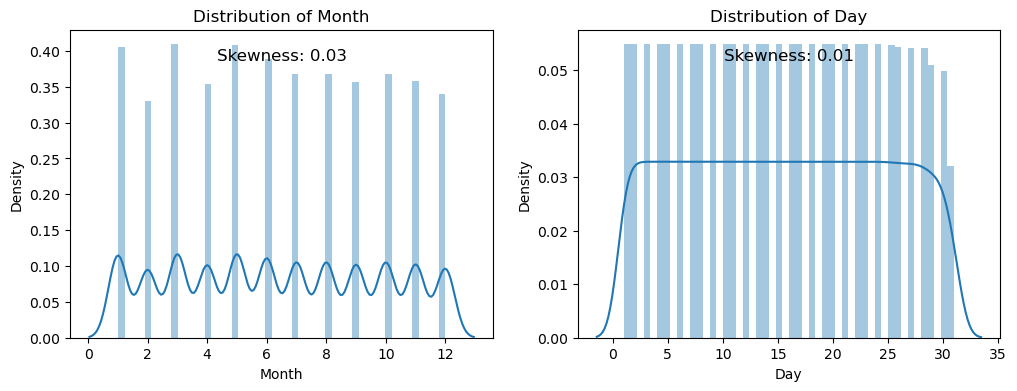

In [702]:
# Create a subplot grid
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Create the distribution plots for 'Month' and 'Day'
sns.distplot(df['Month'], ax=axes[0])
sns.distplot(df['Day'], ax=axes[1])

# Calculate skewness for 'Day'
skewness1 = stats.skew(df['Month'])
skewness2 = stats.skew(df['Day'])

# Add skewness information to the plots
axes[0].text(0.5, 0.9, f'Skewness: {skewness1:.2f}', transform=axes[0].transAxes, fontsize=12, ha='center')
axes[1].text(0.5, 0.9, f'Skewness: {skewness2:.2f}', transform=axes[1].transAxes, fontsize=12, ha='center')

# Set titles and labels
axes[0].set_title('Distribution of Month')
axes[0].set_xlabel('Month')
axes[1].set_title('Distribution of Day')
axes[1].set_xlabel('Day')

# Display the plots
plt.show()

We can see that both variables are uniformly distributed, with no skew present.  
Now let's look at the 'float64' variables

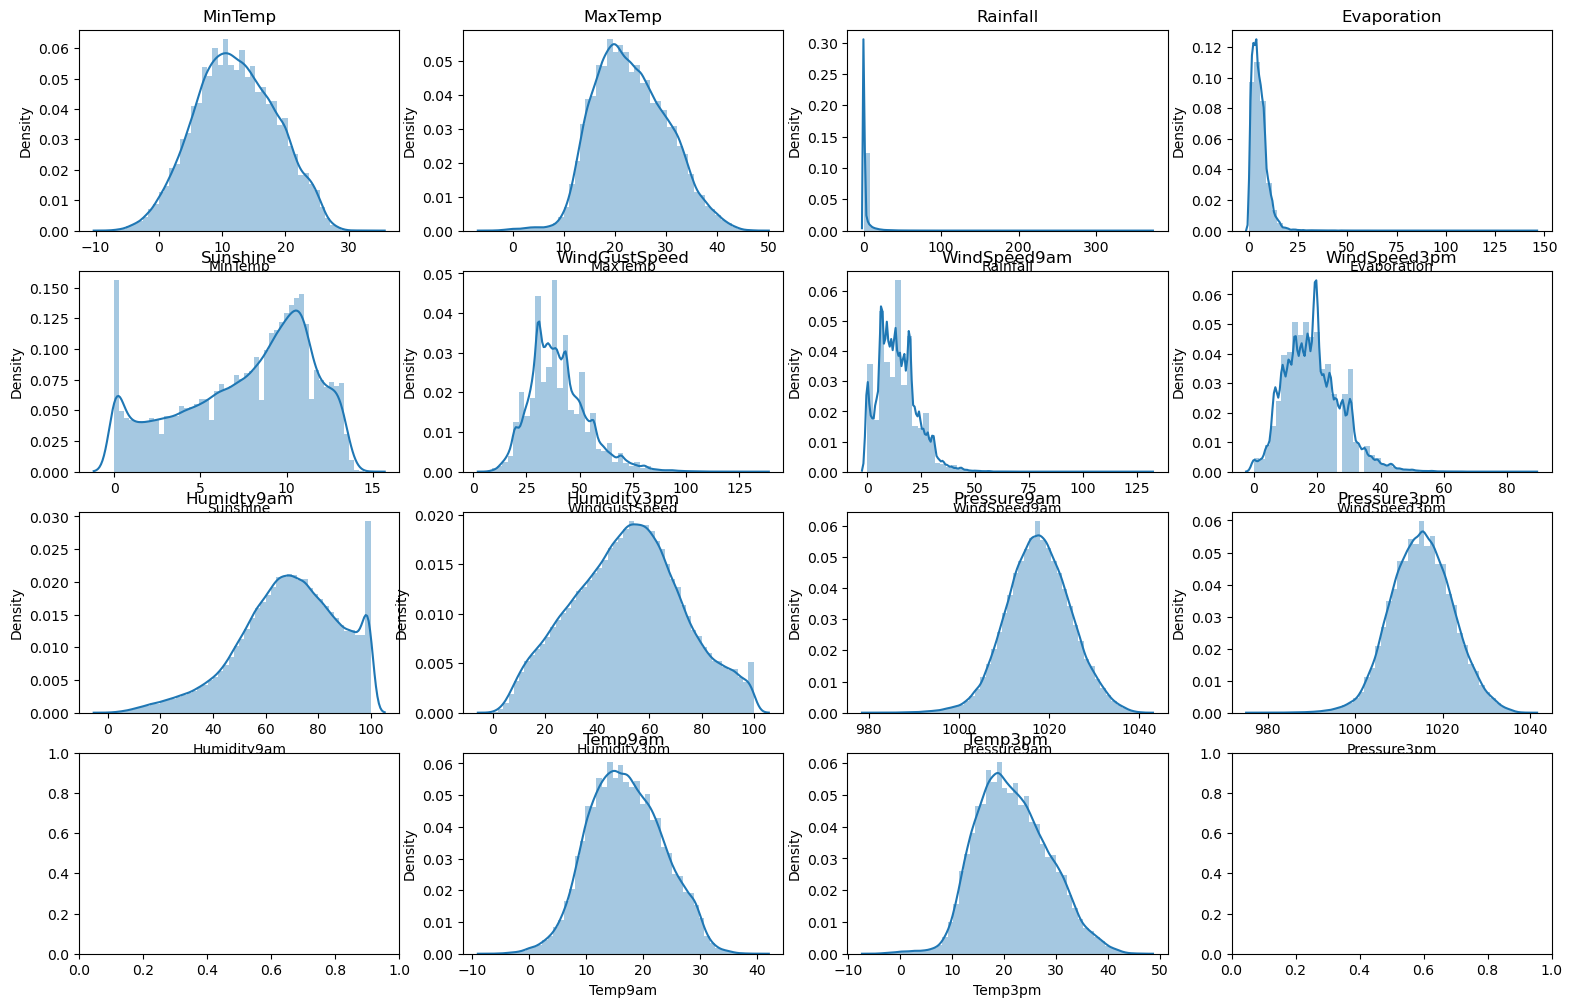

In [670]:
# Create a subplot grid
fig, axes = plt.subplots(4, 4, figsize=(19, 12))

# Create the distribution plots
sns.distplot(df['MinTemp'], ax=axes[0,0])
sns.distplot(df['MaxTemp'], ax=axes[0,1])
sns.distplot(df['Rainfall'], ax=axes[0,2])
sns.distplot(df['Evaporation'], ax=axes[0,3])
sns.distplot(df['Sunshine'], ax=axes[1,0])
sns.distplot(df['WindGustSpeed'], ax=axes[1,1])
sns.distplot(df['WindSpeed9am'], ax=axes[1,2])
sns.distplot(df['WindSpeed3pm'], ax=axes[1,3])
sns.distplot(df['Humidity9am'], ax=axes[2,0])
sns.distplot(df['Humidity3pm'], ax=axes[2,1])
sns.distplot(df['Pressure9am'], ax=axes[2,2])
sns.distplot(df['Pressure3pm'], ax=axes[2,3])
sns.distplot(df['Temp9am'], ax=axes[3,1])
sns.distplot(df['Temp3pm'], ax=axes[3,2])

# Set titles
axes[0,0].set_title('MinTemp')
axes[0,1].set_title('MaxTemp')
axes[0,2].set_title('Rainfall')
axes[0,3].set_title('Evaporation')
axes[1,0].set_title('Sunshine')
axes[1,1].set_title('WindGustSpeed')
axes[1,2].set_title('WindSpeed9am')
axes[1,3].set_title('WindSpeed3pm')
axes[2,0].set_title('Humidty9am')
axes[2,1].set_title('Humidity3pm')
axes[2,2].set_title('Pressure9am')
axes[2,3].set_title('Pressure3pm')
axes[3,1].set_title('Temp9am')
axes[3,2].set_title('Temp3pm')


# Display the plots
plt.show()

In [703]:
skewness = df.select_dtypes(include=['float64']).apply(lambda x: x.skew())
skewness

MinTemp          0.021099
MaxTemp          0.220613
Rainfall         9.836507
Evaporation      3.761286
Sunshine        -0.496480
WindGustSpeed    0.874800
WindSpeed9am     0.777588
WindSpeed3pm     0.628096
Humidity9am     -0.483664
Humidity3pm      0.033811
Pressure9am     -0.095447
Pressure3pm     -0.045516
Cloud9am        -0.229161
Cloud3pm        -0.226289
Temp9am          0.088407
Temp3pm          0.237751
RainToday        1.322648
RainTomorrow     1.322729
ENSO            -5.692946
dtype: float64

In [704]:
summary_df = pd.DataFrame(columns=['Variable','Mean','Median'])

# Loop through the columns in the original DataFrame
for column in df2.columns:
    # Calculate the mean and median for each variable
    mean_value = df2[column].mean()
    median_value = df2[column].median()
    
    # Append the variable name, mean, and median to the summary DataFrame
    summary_df = summary_df.append({'Variable': column, 'Mean': mean_value, 'Median': median_value}, ignore_index=True)

# Display the summary DataFrame
print(summary_df)

         Variable         Mean  Median
0             Day    15.714525    16.0
1           Month     6.432591     6.0
2         MinTemp    12.664991    12.4
3         MaxTemp    23.656536    23.1
4        Rainfall     2.377797     0.0
5   WindGustSpeed    40.786909    39.0
6    WindSpeed9am    15.178890    13.0
7    WindSpeed3pm    19.500328    19.0
8     Humidity9am    67.401604    68.0
9     Humidity3pm    50.665114    51.0
10    Pressure9am  1017.423965  1017.4
11    Pressure3pm  1015.047014  1015.0
12        Temp9am    17.462367    17.1
13        Temp3pm    22.128102    21.6
14   RainLastWeek     0.224821     0.0
15      RainToday     0.224662     0.0
16   RainTomorrow     0.221563     0.0


In [705]:
df2.mode()[0:1]

,Day,Month,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainLastWeek,RainToday,RainTomorrow
0,6,1.0,12.7,19.9,0.0,35.0,9.0,17.0,65.0,55.0,1016.4,1015.5,14.8,19.3,0,0,0


Variables of note with clear skews are;
1. Rainfall (Positively Skewed)
2. Evaporation (Positively Skewed)

Whilst the following appear to be bi-modal
1. Sunshine
2. Humidity9am

Further investigation is warranted

### 2. There may be inconsistencies or errors in the data. List the errors identified and detail how you have identified them.

#### Inconsistent/Noisy Data Investigation

In [674]:
# Iterate through columns and get value counts
for column in df.columns:
    counts = df[column].value_counts(dropna=False).sort_index(ascending=True)
    print(f"Value counts for column {column}:\n{counts}\n")

Value counts for column Date:
2007-11-01     1
2007-11-02     1
2007-11-03     1
2007-11-04     1
2007-11-05     1
2007-11-06     1
2007-11-07     1
2007-11-08     1
2007-11-09     1
2007-11-10     1
2007-11-11     1
2007-11-12     1
2007-11-13     1
2007-11-14     1
2007-11-15     1
2007-11-16     1
2007-11-17     1
2007-11-18     1
2007-11-19     1
2007-11-20     1
2007-11-21     1
2007-11-22     1
2007-11-23     1
2007-11-24     1
2007-11-25     1
2007-11-26     1
2007-11-27     1
2007-11-28     1
2007-11-29     1
2007-11-30     1
2007-12-01     1
2007-12-02     1
2007-12-03     1
2007-12-04     1
2007-12-05     1
2007-12-06     1
2007-12-07     1
2007-12-08     1
2007-12-09     1
2007-12-10     1
2007-12-11     1
2007-12-12     1
2007-12-13     1
2007-12-14     1
2007-12-15     1
2007-12-16     1
2007-12-17     1
2007-12-18     1
2007-12-19     1
2007-12-20     1
2007-12-21     1
2007-12-22     1
2007-12-23     1
2007-12-24     1
2007-12-25     1
2007-12-26     1
2007-12-27     1
2

**Inconsistent Values**

The ENSO variable presents multiple issues. There are seperate responses of 'Yes' and 'yes'. Additionally, there are additional missing values ontop of our NaN values, with '.' used over 100 times.

It was also noted that there are some potential double ups in Location i.e. Sydney and Sydney Airport. However, presumably these are two geographically different locations where data was recorded, hence results are valid as individual entries

**Outliers**

A potential outlier of 145 was noted in 'Evaporation'. This is an extremely high values that would likely indicate an error in measurement or an extreme weather event.

**Missing Data** 

The proportion of missing values for each variable is graphically displayed below. 

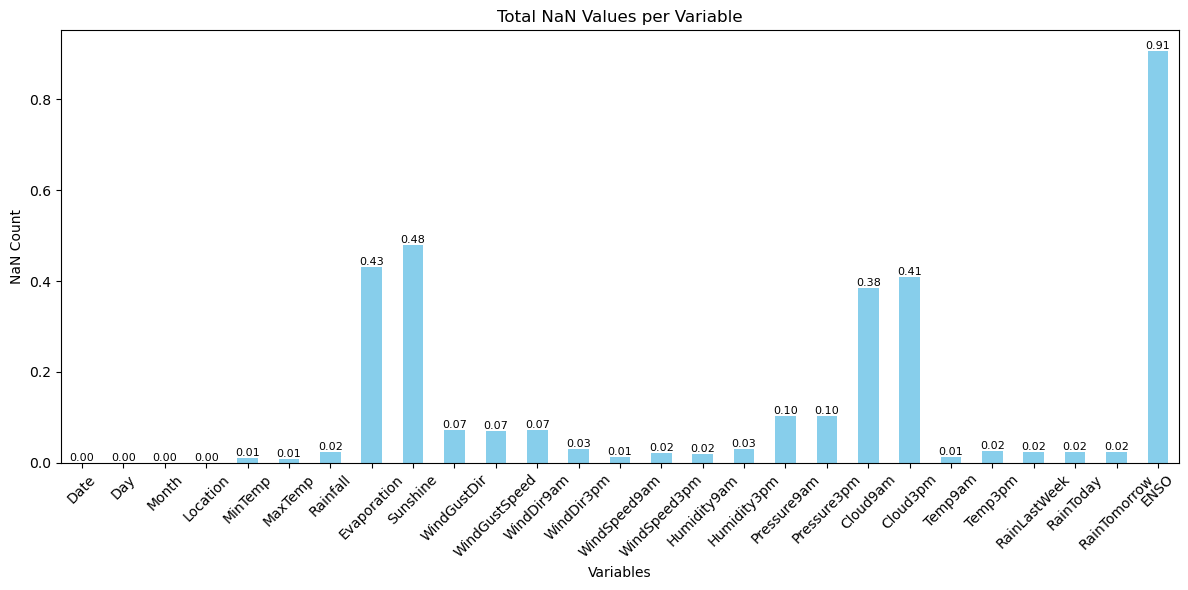

In [706]:
nan_counts = df.isna().sum()/145490

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = nan_counts.plot(kind='bar', color='skyblue')
plt.title('Total NaN Values per Variable')
plt.xlabel('Variables')
plt.ylabel('NaN Count')
plt.xticks(rotation=45)

# Add data labels to the bars
for i, v in enumerate(nan_counts):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

### 3. Summarise your findings (e.g., noise and data quality problem in the data, patterns that you may have observed, etc) during this data exploration process

- **Missing values.** NaN values across multiple variables is the primary data quality problem with this data set. A decision needs to be made about wether to ignore or remove these missing values in future analysis, or to fill them with a value (with a global constant, a mean/median value or a modal value). The variable 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm' and 'ENSO' all have very high proportions of NaN values. A NaN analysis may be warrented
- **Distribution**. There are strong postive skews in the distribution of the variables 'Rainfall', 'Evaporation'. This should be ackowledged when interpreting summary statistics. It was also noted that the variables Sunshine and Humidity9am were Bimodal
- **Outlier.** A potential outlier is present for the variable 'Evaporation'. In a real world scenario, this value should be validated through the correct channels. As this cannot be done for this task, they will be just acknowledged in future results
- **Inconsistent Data.** The ENSO variable presents multiple issues. Firstly, the data is inconsistent, with seperate responses of 'Yes' and 'yes'. These should be collated togethor. Secondly, there are additional missing values ontop of our NaN values, with '.' over 100 times. These need to be treated as NaN's, and dealt with accordingly

### 4. Give the details (location and month) of the longest day (the day which had the most sunshine) recorded in this dataset.

In [676]:
max_value_row = df[df['Sunshine'] == df['Sunshine'].max()]
print(max_value_row)

            Date  Day  Month Location  MinTemp  MaxTemp  Rainfall  \
72886 2015-12-28   28     12  Mildura     12.8     30.5       0.0   

       Evaporation  Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
72886         12.0      14.5          SE           37.0        SSE         SE   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
72886          15.0          20.0         45.0         17.0       1023.7   

       Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainLastWeek  \
72886       1020.8       0.0       0.0     17.9     28.7           No   

       RainToday  RainTomorrow  ENSO  
72886          0             0  <NA>  


The day in this data set with the most sunshine was recorded on the 28th of December, 2015 in Mildura, with 14.5 hours of sunshine recorded.

### 5. What was the average maximum temperature recorded in 2016 in Uluru when the sudden burst in wind speed was in the Southerly direction?

In [677]:
filtered_data = df[(df['Date'].dt.year == 2016) & (df['Location'] == 'Uluru') & ((df['WindGustDir'] == 'S') | (df['WindGustDir'] == 'SW') | (df['WindGustDir'] == 'SE') | (df['WindGustDir'] == 'SSE') | (df['WindGustDir'] == 'SSW'))]
filtered_data['MaxTemp'].mean()

30.388118811881185

### 6.List the top-5 locations based on the total amount of rainfall recorded in 2017. 

In [678]:
filtered_data = df[(df['Date'].dt.year == 2017)]
summary = filtered_data.groupby('Location')['Rainfall'].sum().reset_index().sort_values(by='Rainfall', ascending=False)
print(summary.head(5))

        Location  Rainfall
13        Darwin    1739.0
11  CoffsHarbour    1307.8
8         Cairns    1256.2
16     Katherine    1133.8
37        Sydney     865.8


### 7. Give a summary of the wind directions such as the frequency of a particular wind direction when it was a rainy day.

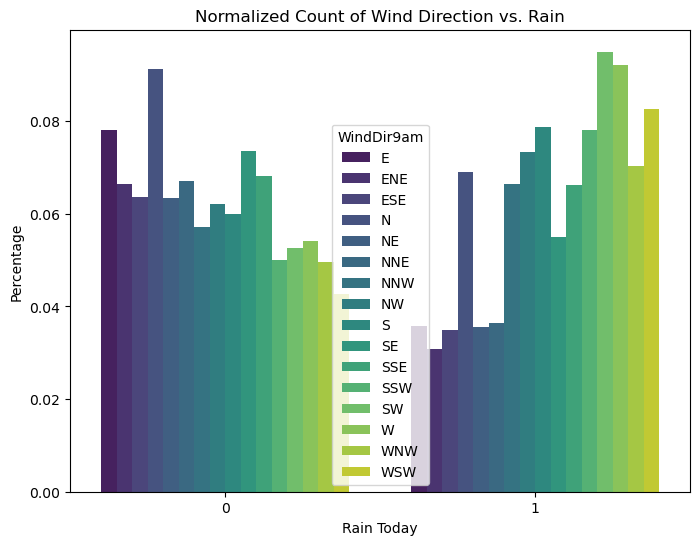

In [679]:
normalized_counts = df.groupby(['RainToday'])['WindDir9am'].value_counts(normalize = True).rename('Percentage').reset_index()

# Sort the DataFrame by 'WindDir9am' in alphabetical order
normalized_counts = normalized_counts.sort_values(by=['WindDir9am'])

# Create a grouped bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='RainToday', y='Percentage', hue='WindDir9am', data=normalized_counts, palette='viridis')
plt.title('Normalized Count of Wind Direction vs. Rain')
plt.xlabel('Rain Today')
plt.ylabel('Percentage')
plt.show()

## Task 3. Use suitable visualisation plots
(i) Understand the distribution of variables and identify data quality problems.

In [680]:
df.duplicated().sum()

0

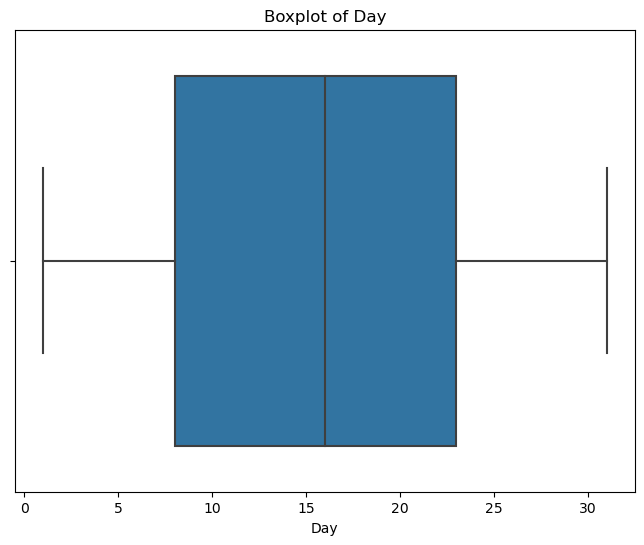

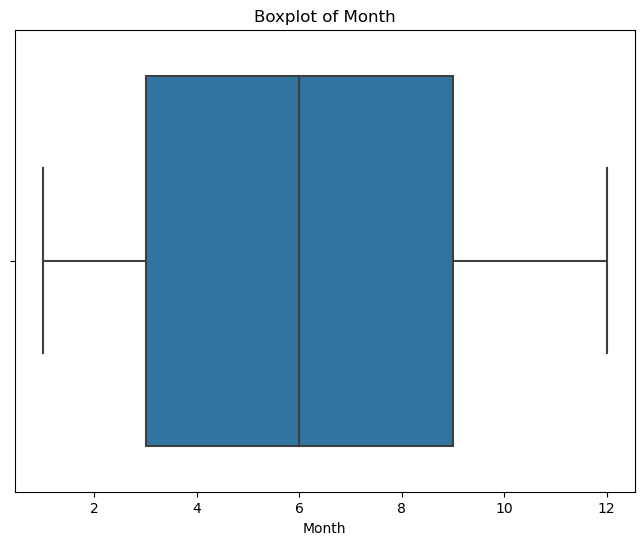

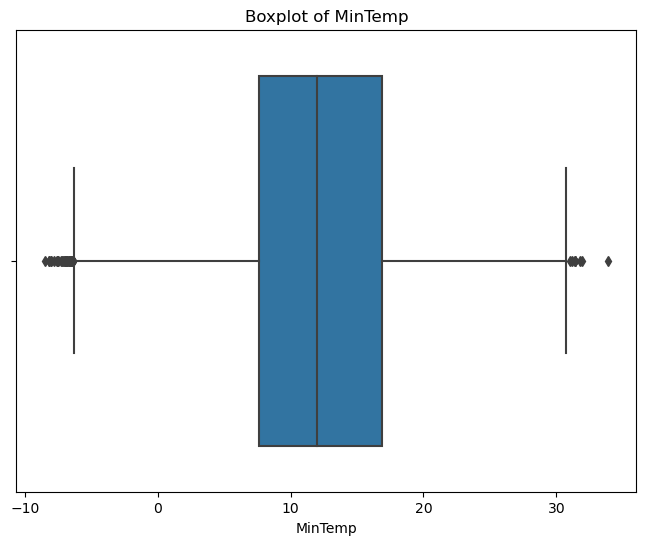

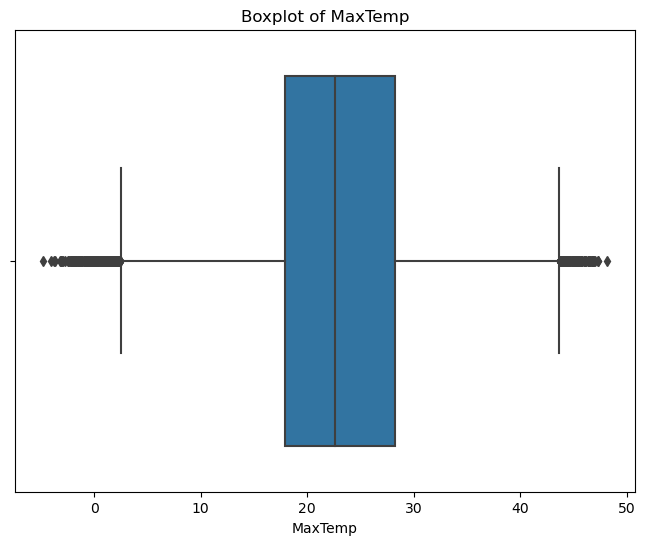

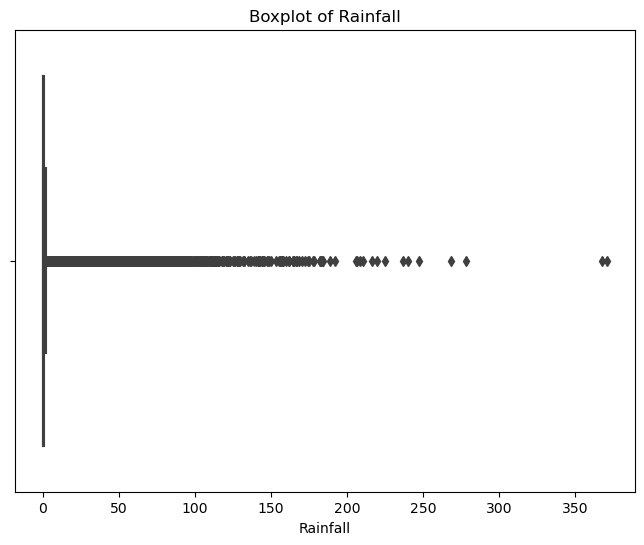

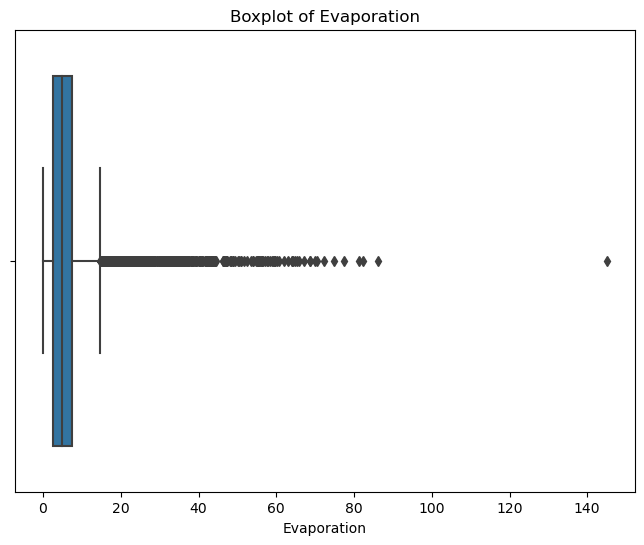

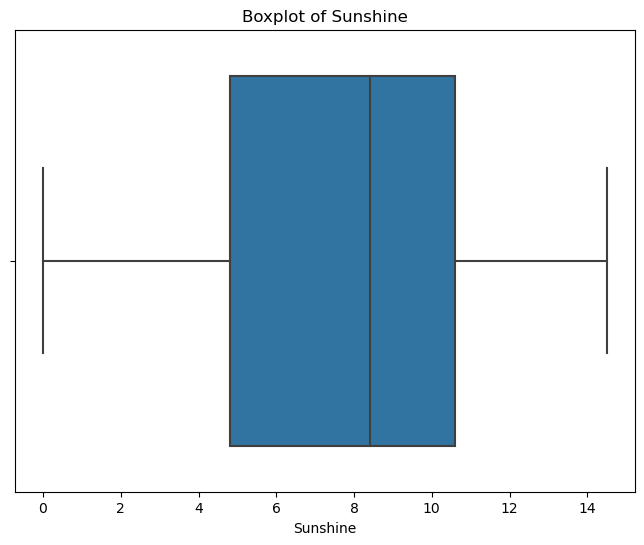

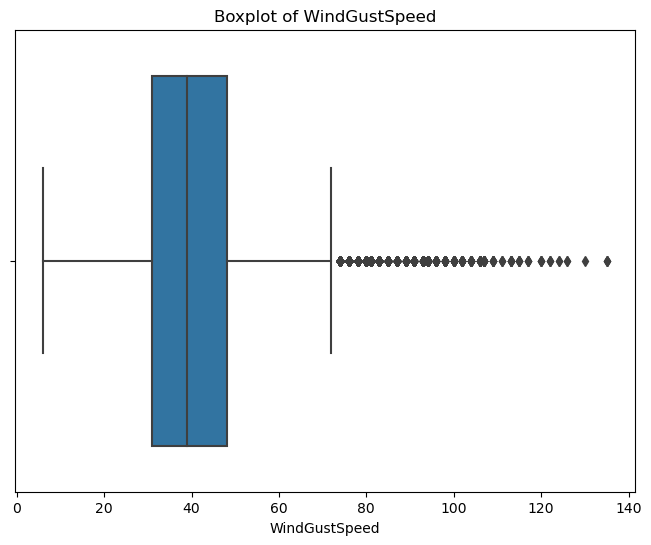

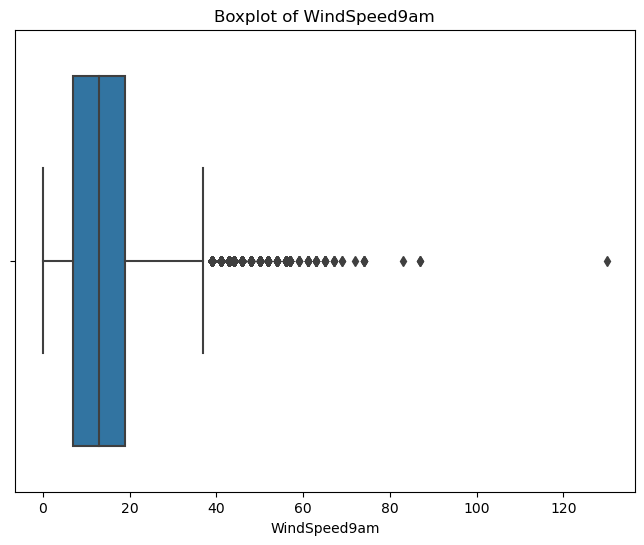

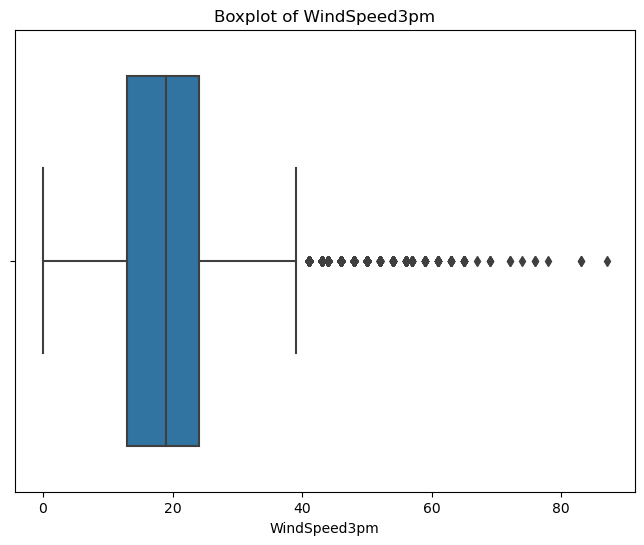

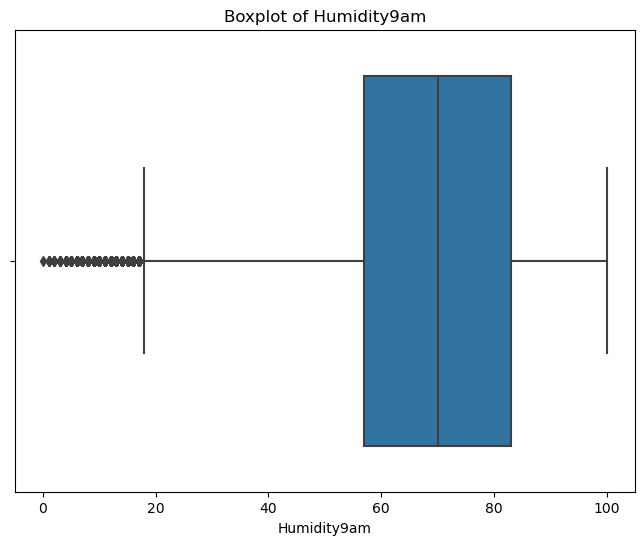

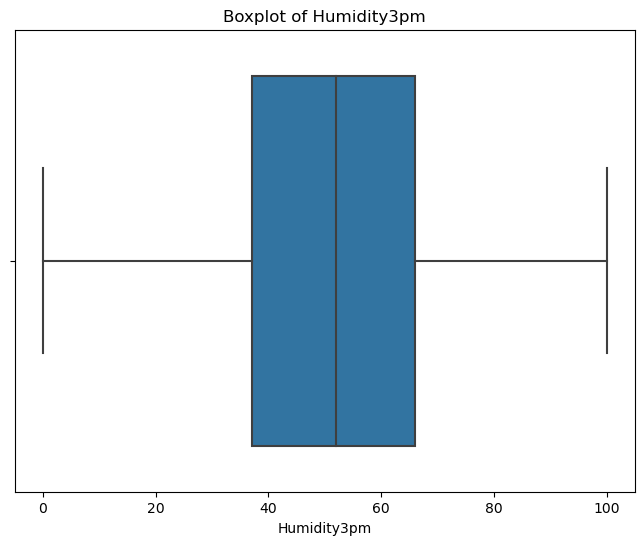

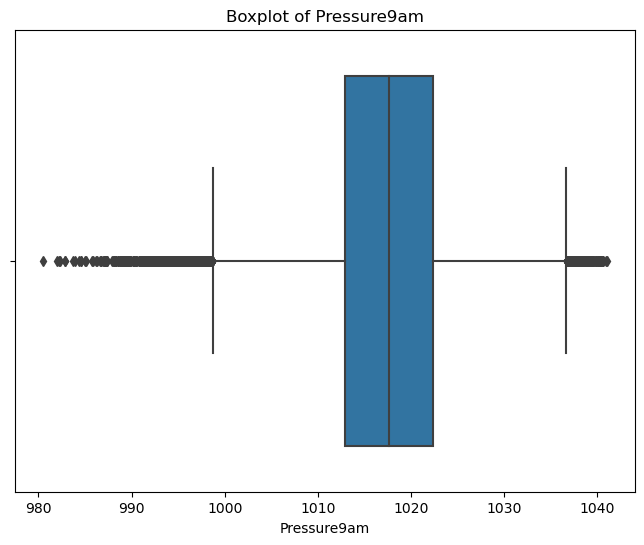

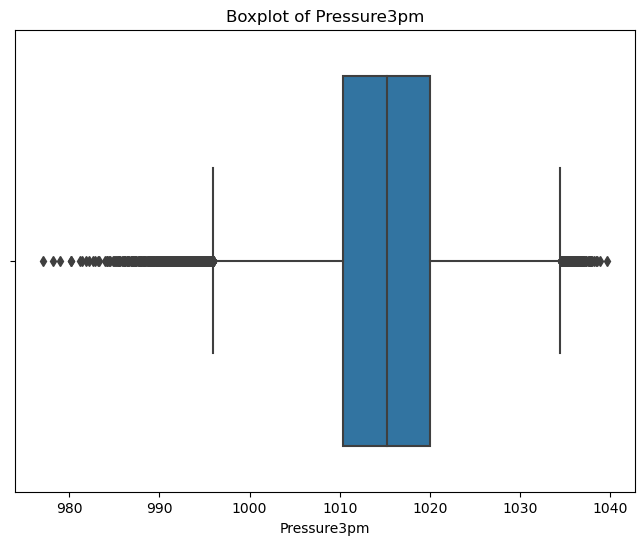

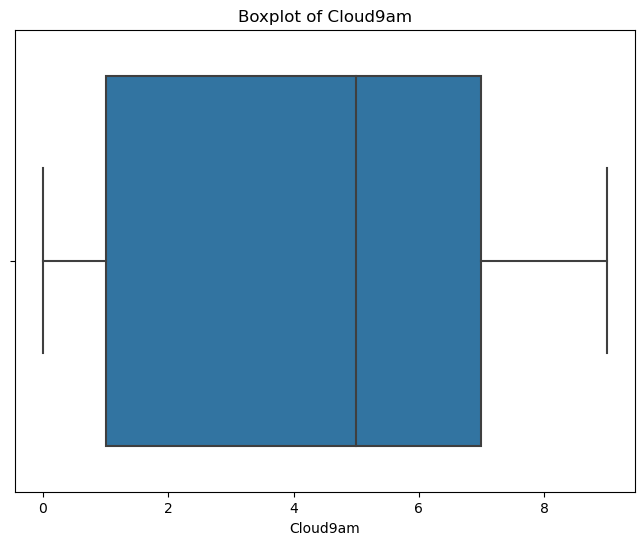

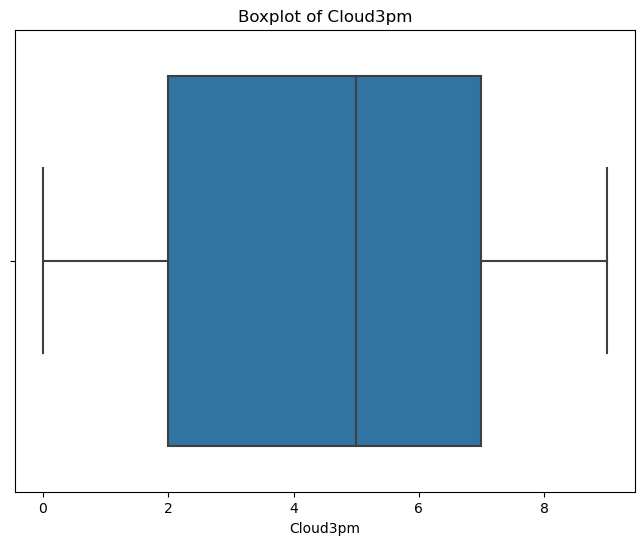

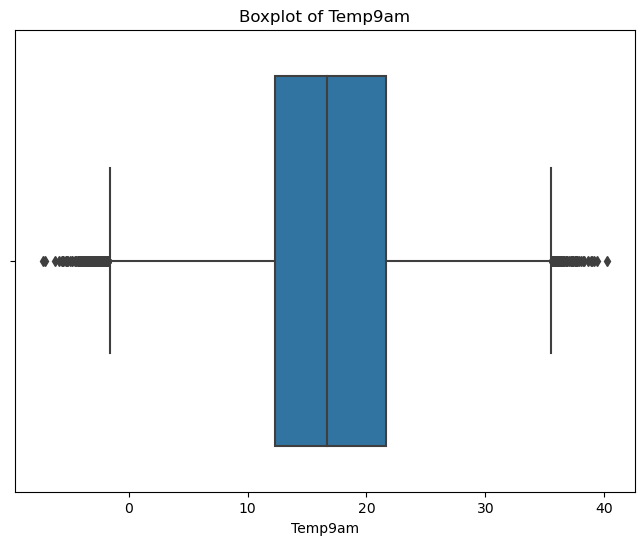

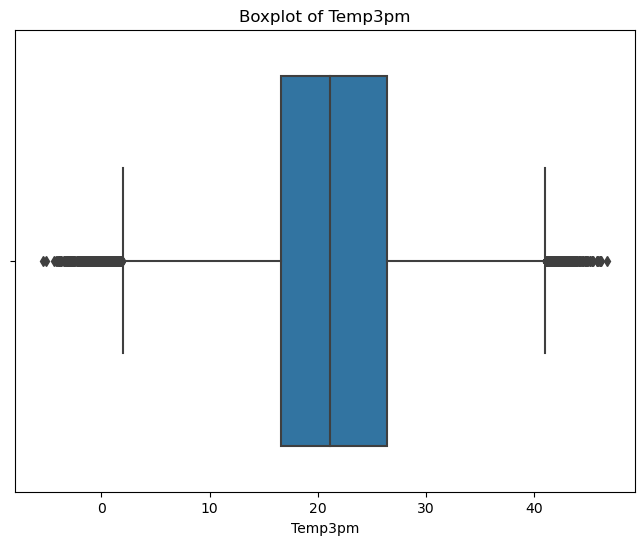

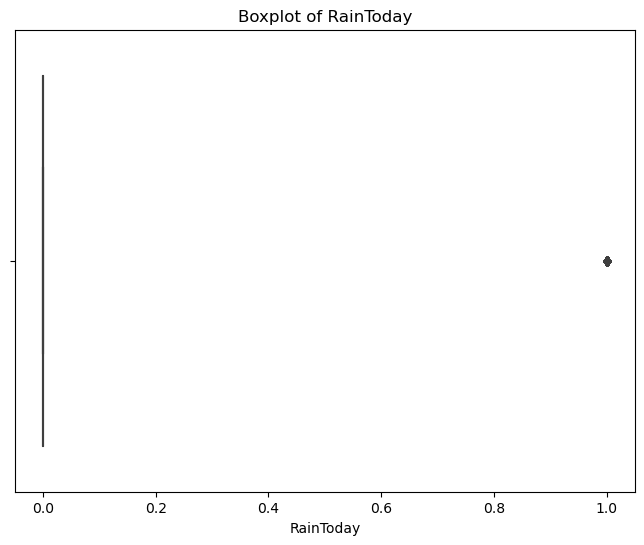

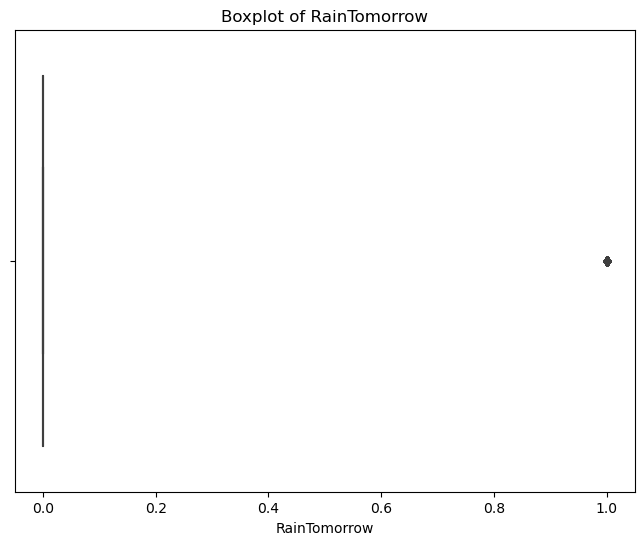

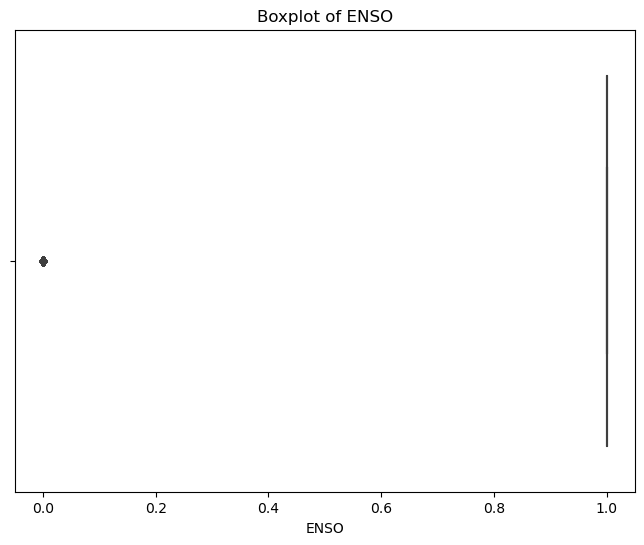

In [681]:
# Select numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['int', 'float'])

# Create a boxplot for each numeric column
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

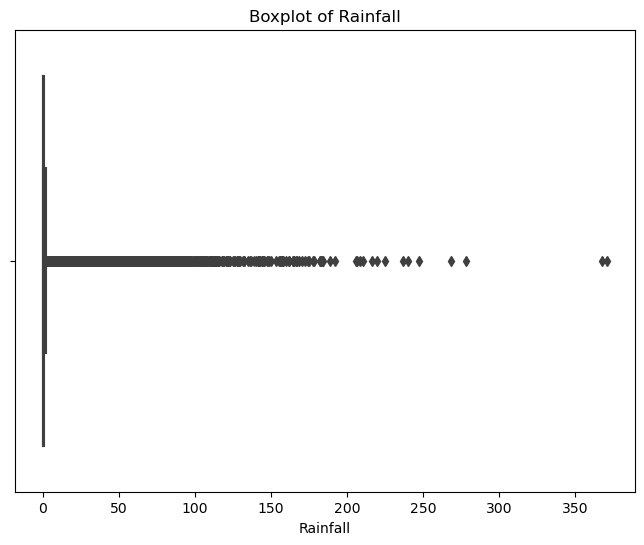

In [682]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Rainfall'])
plt.title(f'Boxplot of Rainfall')
plt.show()

In [683]:
df['Rainfall'].describe()

count    142228.000000
mean          2.360812
std           8.477432
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: Rainfall, dtype: float64

(ii) Determine if there is any relationship between the variables Humidity3pm and Pressure3pm? How would you handle these two variables in the data modelling if a relationship exists?


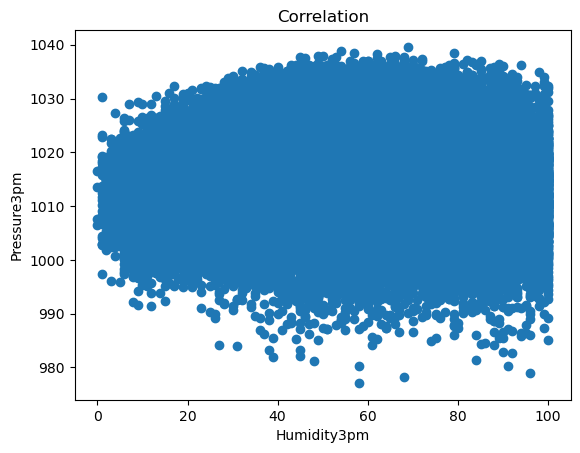

In [684]:
plt.scatter(df['Humidity3pm'], df['Pressure3pm'])
plt.title('Correlation')
plt.xlabel('Humidity3pm')
plt.ylabel('Pressure3pm')
plt.show()

In [685]:
df['Humidity3pm'].corr(df['Pressure3pm'])

0.05213986998684261

Scatterplot and correlation coefficient indicate that there is no relationship present between these two variables

If a relationship existed between two variables existed, we would need to decided if one of the variables were redundant. If so, we would need to determine if we would keep both or only one for future data modelling

(iii) Identify the highly correlated variable pairs and elaborate on how to treat these variables in the mining process in such a case.


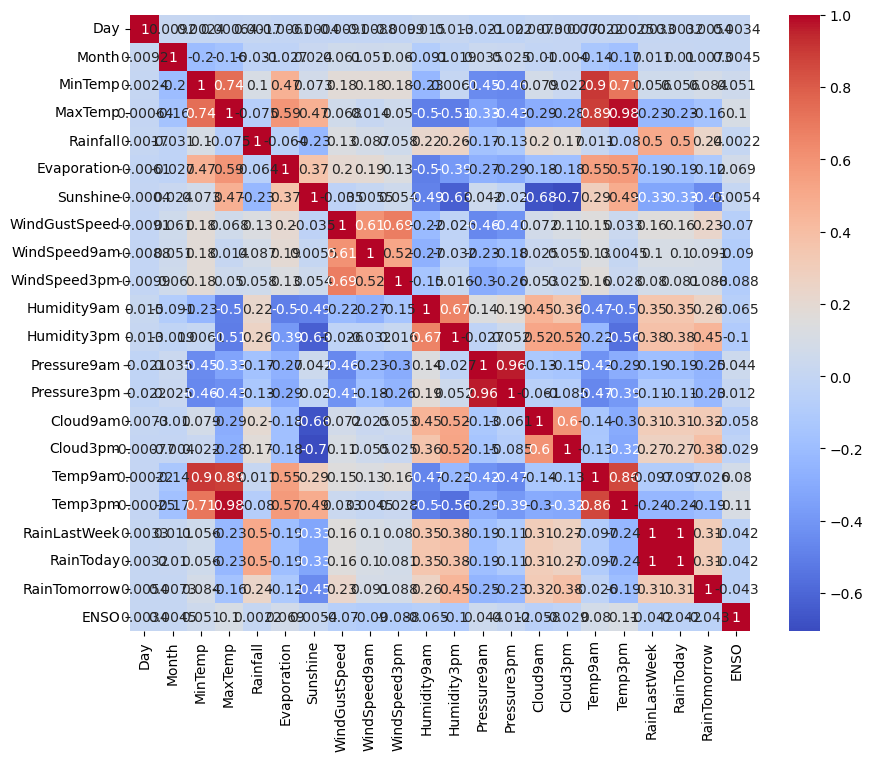

In [710]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

A correlation Coefficient value of greater than 0.7 or less than -0.7 is often considered as indicating a strong linear relationship. If we use this as a guide, the following pairs of variables are highly correlated
- MinTemp and Max Temp (R = 0.74)
- MinTemp and Temp9am (R = 0.9)
- MinTemp and Temp3pm (R = 0.71)
- MaxTemp and Temp9am (R = 0.89)
- MaxTemp and Temp3pm (R = 0.98)
- Pressure9am and Pressure3pm (R = 0.96)
- Temp9am and Temp3pm (R = 0.86)
- RainToday and RainLastWeek (R = 1)
- Cloud9am and Sunshine (R = -0.68)
- Cloud3pm and Sunshine (R = -0.7)


In [713]:
print(df.groupby(['RainLastWeek'])['RainToday'].value_counts(dropna=False))

RainLastWeek  RainToday
0.0           0.0          110323
1.0           1.0           31887
              0.0              18
Name: RainToday, dtype: int64


- There are several strong positive correlations present between the variables MinTemp, MaxTemp, Temp9am and Temp3pm, suggesting colinearity between these variables. It is therefore suggested to remove Temp9am and Temp3pm from the data set. MinTemp and MaxTemp are probably more uesful representations of weather for the whole day, and this will reduce dimesions of our dataframe whilst keeping relevant information. 
- The RainLastWeek variable appears to be redunant, as RainToday stores the same information. This should be removed
- Finally, the top negative correlations come from our Cloud variables and Sunshine. It is recomended that we keep Sunshine and remove both Cloud variables as it effectively reduces more dimensions and still keeps relevant information

(iv) Summarise your findings (e.g., noise and data quality problem in the data, patterns that you may have observed, etc) during this data exploration process.

## Task 4. Prepare data
(i) Elaborate on the data preparation steps required (by correcting the data types of some variables, data cleaning and data transformation) to address the data quality problems that you encountered during data exploration.

Then, lets remove the variables 'Temp9am', 'Temp3pm', 'Cloud9am', 'Cloud3pm' and 'RainLastWeek' from our data frame due to colinearity

In [737]:
df = df.drop(['Temp9am', 'Temp3pm', 'Cloud9am', 'Cloud3pm', 'RainLastWeek'], axis=1)

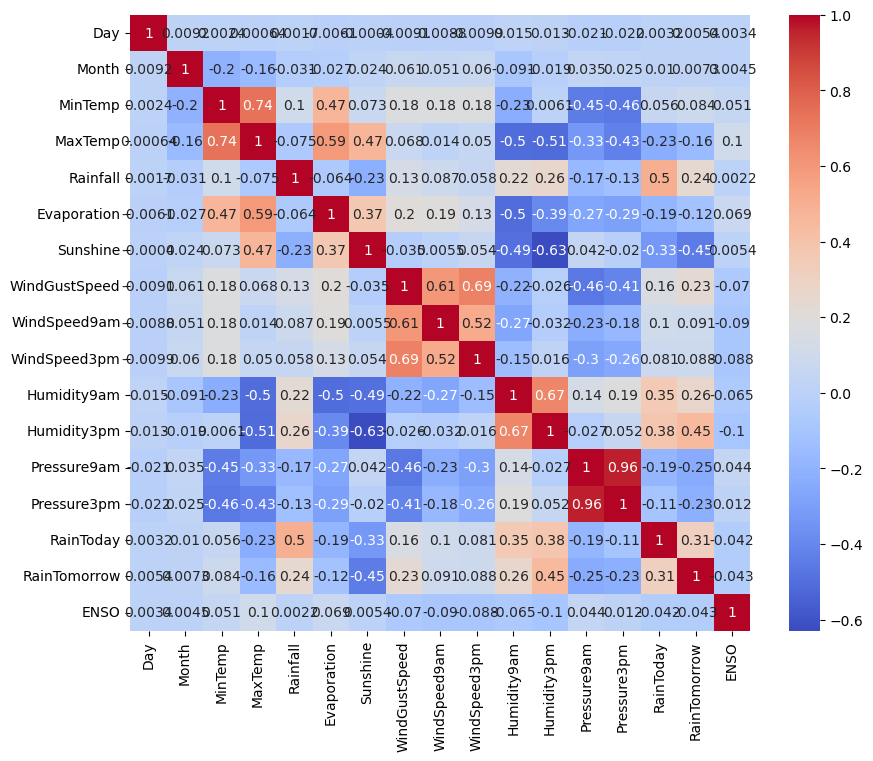

In [738]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Secondly, the NaN variables will be addressed. First, lets look at the numeric variables in our data set

In [739]:
# Create a new DataFrame with numeric variables
numeric_df = df.select_dtypes(include=['int', 'float'])

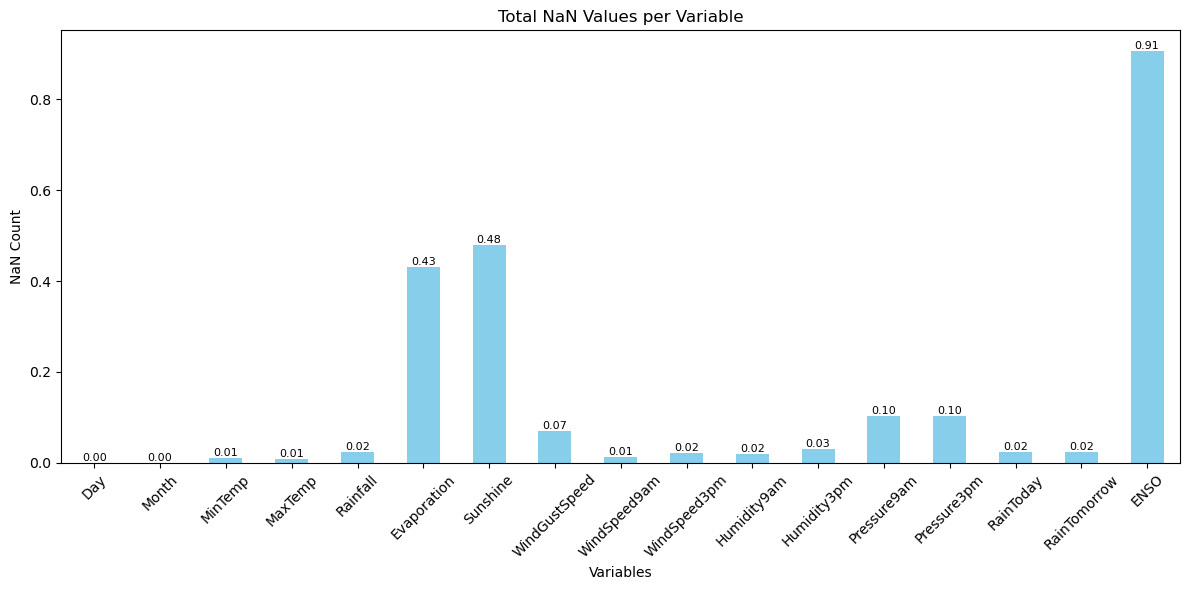

In [740]:
nan_counts = numeric_df.isna().sum()/145490

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = nan_counts.plot(kind='bar', color='skyblue')
plt.title('Total NaN Values per Variable')
plt.xlabel('Variables')
plt.ylabel('NaN Count')
plt.xticks(rotation=45)

# Add data labels to the bars
for i, v in enumerate(nan_counts):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

The variables 'Evaporation', 'Sunshine' and 'ENSO' have high proportions of NaN's and warrent further investigation. 

Additionally, the variables 'RainToday' and 'RainTomorrow' are binary representations of Yes/No response, and should be treated differently to the rest of the numeric data. 

For the remainder of the variables, it seems appropriate to fill the missing values with the means of the variables, pending that they are deemed normally distributed.

In [741]:
# Significance level (alpha) for the Anderson-Darling test
alpha = 0.05

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['Column', 'Anderson-Darling Statistic', 'Critical Value', 'Normality'])

# Iterate through the columns of the DataFrame
for column in numeric_df.columns:
    # Filter out rows with missing values in the current column
    non_missing_data = numeric_df[column].dropna()

    # Perform the Anderson-Darling test for the non-missing data
    result = stats.anderson(non_missing_data)

    # Find the index corresponding to the alpha level in critical_values
    alpha_index = None
    for i, alpha_value in enumerate(result.significance_level):
        if alpha == alpha_value:
            alpha_index = i
            break

    # Check if the test statistic is greater than the critical value at the specified alpha level
    if alpha_index is not None and result.statistic > result.critical_values[alpha_index]:
        normality = "Not Normal"
    else:
        normality = "Normal"

    # Append the results to the results DataFrame
    results = results.append({'Column': column, 'Anderson-Darling Statistic': result.statistic,
                              'Critical Value': result.critical_values[alpha_index], 'Normality': normality}, ignore_index=True)

# Print or display the results
print(results)

           Column  Anderson-Darling Statistic  \
0             Day                 1657.692085   
1           Month                 2121.747107   
2         MinTemp                  131.013218   
3         MaxTemp                  411.110104   
4        Rainfall                34130.412091   
5     Evaporation                 2015.910460   
6        Sunshine                 1296.483122   
7   WindGustSpeed                 1224.511421   
8    WindSpeed9am                 1125.382854   
9    WindSpeed3pm                  850.999687   
10    Humidity9am                  514.672698   
11    Humidity3pm                  125.612435   
12    Pressure9am                   13.268262   
13    Pressure3pm                   10.124777   
14      RainToday                35993.235857   
15   RainTomorrow                35992.593635   
16           ENSO                 5060.303585   

                           Critical Value Normality  
0   [[0.576, 0.656, 0.787, 0.918, 1.092]]    Normal  
1   [[0.5

The Anderson-Darling Test, with a significance level of 0.05, deems these variables as normally distributed. Hence;

In [742]:
numeric_df = numeric_df.drop(['Day', 'Month', 'Evaporation','Sunshine', 'RainToday', 'RainTomorrow', 'ENSO'], axis=1)
column_names = numeric_df.columns.tolist()

# Replace NaN with mean for the selected columns
for column in column_names:
    mean = df[column].mean()
    df[column].fillna(mean, inplace=True)


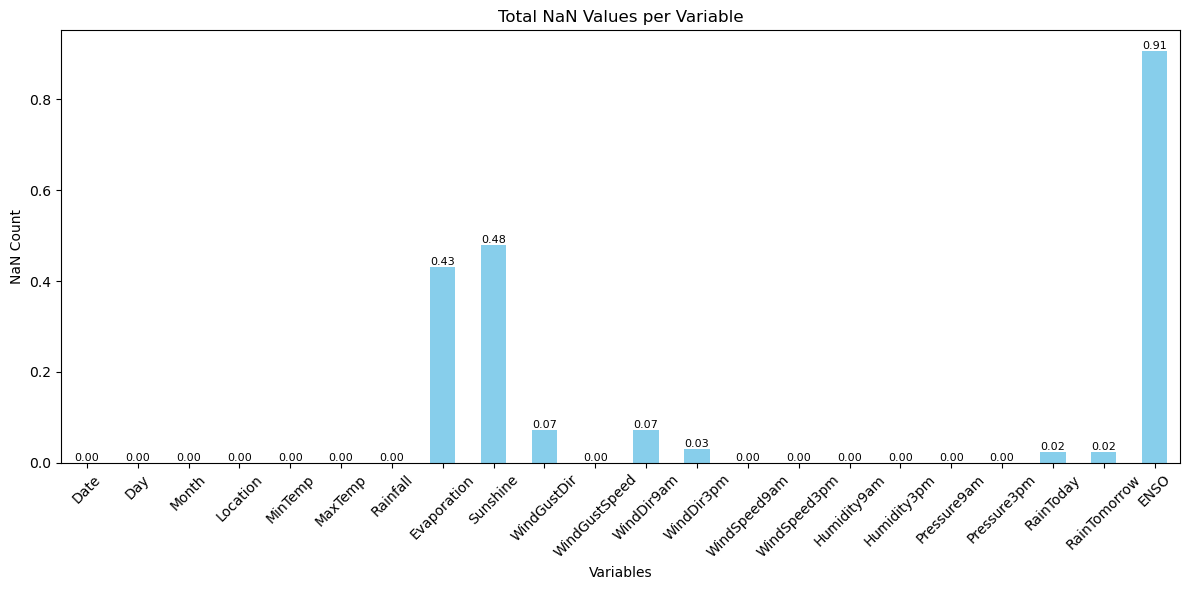

In [743]:
nan_counts = df.isna().sum()/145490

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = nan_counts.plot(kind='bar', color='skyblue')
plt.title('Total NaN Values per Variable')
plt.xlabel('Variables')
plt.ylabel('NaN Count')
plt.xticks(rotation=45)

# Add data labels to the bars
for i, v in enumerate(nan_counts):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [754]:
df.groupby("RainToday")["Rainfall"].describe()

,count,mean,std,min,25%,50%,75%,max
RainToday,,,,,,,,
0.0,110341.0,0.075251,0.199147,0.0,0.0,0.0,0.0,1.0
1.0,31887.0,10.269712,15.485291,1.1,2.4,5.2,11.8,371.0


Let's now address the categorical variables

In [ ]:
# Create a new DataFrame with non-numeric variables
nonnumeric_df = df.select_dtypes(exclude=['int', 'float'])

In [ ]:
nan_counts = nonnumeric_df.isna().sum()/145490

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = nan_counts.plot(kind='bar', color='skyblue')
plt.title('Total NaN Values per Variable')
plt.xlabel('Variables')
plt.ylabel('NaN Count')
plt.xticks(rotation=45)

# Add data labels to the bars
for i, v in enumerate(nan_counts):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

The variables 'Cloud9am', 'Cloud3pm' and 'ENSO' have high proportions of NaN values, and warrent furtehr investigation. However, the rest it seems appropriate to fill with the modal value of the variable

In [ ]:
nonnumeric_df = nonnumeric_df.drop(['Date', 'Location','ENSO'], axis=1)
column_names = nonnumeric_df.columns.tolist()

# Replace NaN with mean for the selected columns
for column in column_names:
    mode = df[column].mode()[0]
    df[column].fillna(mode, inplace=True)


In [ ]:
nan_counts = df.isna().sum()/145490

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = nan_counts.plot(kind='bar', color='skyblue')
plt.title('Total NaN Values per Variable')
plt.xlabel('Variables')
plt.ylabel('NaN Count')
plt.xticks(rotation=45)

# Add data labels to the bars
for i, v in enumerate(nan_counts):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

We now just need to determine what will be done with the 3 variables remaining with high NaN proportions

In [ ]:
# Create a missing data heatmap for the entire dataset
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

There is far too much missing data in the variable 'ENSO' to fill with modal responses. But there may be useful information held within the limited responses there are. Since it is a categorical variable, it was decided that these missing values be filled with an 'NaN' place holder

In [ ]:
df['ENSO'] = df['ENSO'].fillna('NaN')

In [ ]:
Regression imputation?

(ii) Demonstrate the data preparation by including a screenshot(s) of the Python code and its outputs that show the steps on how you had corrected all the identified data quality problems in this dataset.

#### NaN Values

In [ ]:
nan_counts = df.isna().sum()/145490

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = nan_counts.plot(kind='bar', color='skyblue')
plt.title('Total NaN Values per Variable')
plt.xlabel('Variables')
plt.ylabel('NaN Count')
plt.xticks(rotation=45)

# Add data labels to the bars
for i, v in enumerate(nan_counts):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

The following variables have a high proportion of values missing

1. Evaporation - 43% missing
2. Sunshine - 48% missing
3. Cloud9am - 38% missing
4. Cloud3pm - 40% missing
5. ENSO - 91% missing

Is it worth considering omitting this values from the data set entirely?

#### Analysis of NaN values

In [ ]:
missing_values = df['ENSO']
df['ENSO'].describe()

In [ ]:
df['ENSO'].isna().mean()*100

In [ ]:
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.show()

In [ ]:
# Create a new DataFrame with non-numeric variables
non_numeric_df = df.select_dtypes(exclude=['int', 'float'])

In [ ]:
# Add NaN values to the columns
x = df['Sunshine'].fillna('NaN')
y = df['Day'].fillna('NaN')

# Create the two-way table with NaN values included
crosstab = pd.crosstab(x, y, dropna=False, normalize = 'index')


crosstab.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Bar Plot of Two-Way Table with Percentages')
plt.xlabel(x.name)
plt.ylabel('Percentage')
plt.legend(title=y.name, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Create the two-way table with NaN values included
crosstab = pd.crosstab(x, y, dropna=False)
crosstab

In [ ]:
nan_counts = numeric_df.isna().sum()/145490

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = nan_counts.plot(kind='bar', color='skyblue')
plt.title('Total NaN Values per Variable')
plt.xlabel('Variables')
plt.ylabel('NaN Count')
plt.xticks(rotation=45)

# Add data labels to the bars
for i, v in enumerate(nan_counts):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
# Use the dropna() method to remove all rows containing NaN values
df_dropped = df.dropna()

# Display the DataFrame with NaN values dropped
len(df_dropped)/len(df)

Omitting these 5 variables with a high proportion of NA values, and then omitting all remaining rows with NaN values, still leaves us with 78% of original data. This data is now complete

In [ ]:
df = df_dropped

In [ ]:
# Numeric Variables - fill with mean of variable

# Automatically replace NaN values with the mean for numeric columns
#for column in df.columns:
#    if pd.api.types.is_numeric_dtype(df[column]):
#        df[column].fillna(df[column].mean(), inplace=True)


#### Cleaning of ENSO variable

#### Cleaning of skewed variables

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Possibly redundant pairs?
- Min Temp - Max Temp
- Min Temp - Temp 9am
- Min Temp - Temp 3pm
- Max Temp - Temp 9am
- Max Temp - Temp 3pm
- Pressure9am - Pressure3pm
- **RainLastWeek - RainToday**

In [ ]:
print(df.groupby(['RainLastWeek'])['RainToday'].value_counts())

In [ ]:
print(df.info())

In [ ]:
Hence, the skewed variables remaining are

Rainfall (Positively Skewed)
Humidity9am (Negatively Skewed and bi-modal)

In [ ]:
# Using Z-Score Normalisation

# Calculate Means
mean_Rainfall = df['Rainfall'].mean()
mean_Evaporation = df['Evaporation'].mean()
mean_Sunshine = df['Sunshine'].mean()
mean_Humidity9am = df['Humidity9am'].mean()

# Calculate Standard Deviations
std_Rainfall = df['Rainfall'].std()
std_Evaporation = df['Evaporation'].std()
std_Sunshine = df['Sunshine'].std()
std_Humidity9am = df['Humidity9am'].std()

# Apply Transformations
df['Norm_Rainfall'] = (df['Rainfall']-mean_Rainfall)/std_Rainfall
df['Norm_Evaporation'] = (df['Evaporation']-mean_Evaporation)/std_Evaporation
df['Norm_Sunshine'] = (df['Sunshine']-mean_Sunshine)/std_Sunshine
df['Norm_Humidity9am'] = (df['Humidity9am']-mean_Humidity9am)/std_Humidity9am



In [ ]:
# Apply log transformation while ignoring NaN values
Cbrt_Rainfall = (df['Rainfall'])**(1/3)

# Create a subplot grid
fig, axes = plt.subplots(figsize=(9, 6))

# Create the distribution plot
sns.distplot(Cbrt_Rainfall)

# Show the plot
plt.show()

## Task 5. Select data mining task and feature selection
(i) Identify the most suitable data mining task (i.e. classification, clustering or association mining) that can be performed on this dataset. Justify your choice.

(ii) What variables will you include in this data mining task and why? Describe here if you need to create any derived variables. Identify the roles (i.e. input or target) of each variable.